<a href="https://colab.research.google.com/github/AndreMSilv/Estudo-em-Python-/blob/main/AnaLisando_FIIS_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#biblioteca

In [2]:
!pip install requests
!pip install bs4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [ ]:
#Webscraping para Rendimentos de Fundos Imobiliarios (FIIS)

In [4]:
FII_url = requests.get("https://www.fundsexplorer.com.br/ranking")
FII_url

<Response [200]>

In [ ]:

FII_bs4 = BeautifulSoup(FII_url.text, "html.parser")
FII_bs4.head()

In [6]:
FII_table = FII_bs4.findAll(attrs={'id':'scroll-wrapper'})

In [7]:
table = FII_table[0].findAll('table')

In [8]:
type(table)

bs4.element.ResultSet

In [10]:
FII_df = pd.read_html(str(FII_table[0]))[0]

In [ ]:
#aqui gerado o diamante bruto, os dados de todos os FIIS disponiveis 

In [11]:
FII_df.columns

Index(['Códigodo fundo', 'Setor', 'Preço Atual', 'Liquidez Diária',
       'Dividendo', 'DividendYield', 'DY (3M)Acumulado', 'DY (6M)Acumulado',
       'DY (12M)Acumulado', 'DY (3M)Média', 'DY (6M)Média', 'DY (12M)Média',
       'DY Ano', 'Variação Preço', 'Rentab.Período', 'Rentab.Acumulada',
       'PatrimônioLíq.', 'VPA', 'P/VPA', 'DYPatrimonial',
       'VariaçãoPatrimonial', 'Rentab. Patr.no Período',
       'Rentab. Patr.Acumulada', 'VacânciaFísica', 'VacânciaFinanceira',
       'QuantidadeAtivos'],
      dtype='object')

In [12]:
str(list(FII_df['Códigodo fundo'].sort_values()))

"['ABCP11', 'AFHI11', 'AFOF11', 'AIEC11', 'ALMI11', 'ALZR11', 'APTO11', 'ARCT11', 'ARRI11', 'ATSA11', 'BARI11', 'BBFI11B', 'BBFO11', 'BBGO11', 'BBIM11', 'BBPO11', 'BBRC11', 'BCFF11', 'BCIA11', 'BCRI11', 'BICE11', 'BICR11', 'BIME11', 'BLCA11', 'BLCP11', 'BLMC11', 'BLMG11', 'BLMO11', 'BLMR11', 'BMLC11', 'BNFS11', 'BPFF11', 'BPML11', 'BRCO11', 'BRCR11', 'BREV11', 'BREV11', 'BREV11', 'BREV11', 'BREV11', 'BREV11', 'BREV11', 'BREV11', 'BRLA11', 'BTAL11', 'BTCR11', 'BTLG11', 'BTRA11', 'BTSG11', 'BTWR11', 'BZLI11', 'CACR11', 'CARE11', 'CBOP11', 'CCRF11', 'CEOC11', 'CJCT11', 'CNES11', 'CORM11', 'CPFF11', 'CPTS11', 'CRFF11', 'CTXT11', 'CVBI11', 'CXAG11', 'CXCE11B', 'CXCI11', 'CXCO11', 'CXRI11', 'CXTL11', 'CYCR11', 'DEVA11', 'DRIT11B', 'DVFF11', 'EDFO11B', 'EDGA11', 'EQIR11', 'ERCR11', 'ERCR11', 'ERCR11', 'ERCR11', 'ERCR11', 'ERCR11', 'ERCR11', 'ERCR11', 'ERPA11', 'ERPA11', 'EURO11', 'EVBI11', 'FAED11', 'FAMB11B', 'FATN11', 'FCFL11', 'FEXC11', 'FIGS11', 'FIIB11', 'FIIP11B', 'FISC11', 'FIVN11', 'F

In [ ]:
#Organizando os dados extraidos 

In [ ]:
#fazendo uma copia para manipular os dados com  mais liberdade

In [13]:
FII_df_backup = FII_df.copy()

In [14]:
FII_df.head()

,Códigodo fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,...,PatrimônioLíq.,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos
0,FIVN11,Shoppings,"R$ 3,23",18114.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 65.491.905,42","R$ 6,96",46.0,NaN,NaN,NaN,NaN,"56,00%",NaN,1
1,BZLI11,Títulos e Val. Mob.,"R$ 17,00",500.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 433.476.412,49","R$ 10,57",161.0,NaN,NaN,NaN,NaN,NaN,NaN,0
2,XTED11,Lajes Corporativas,"R$ 7,53",193.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 27.085.416,91","R$ 13,78",55.0,NaN,NaN,NaN,NaN,"0,00%","100,00%",1
3,ALMI11,Lajes Corporativas,"R$ 905,00",5.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 250.158.727,48","R$ 2.250,09",40.0,NaN,NaN,NaN,NaN,"64,05%",NaN,1
4,PABY11,Híbrido,"R$ 8,40",674.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ -11.316.865,81","R$ -14,92",-56.0,NaN,NaN,NaN,NaN,NaN,NaN,1


In [16]:
FII_df = FII_df.replace(to_replace = r'^R\$ ', value = '', regex = True)

In [ ]:
#Outro problema e o separador decimal 

In [17]:
FII_df['PatrimônioLíq.'] = FII_df['PatrimônioLíq.'].str.replace('.','')
FII_df['Preço Atual'] = FII_df['Preço Atual'].str.replace('.','')
FII_df['Dividendo'] = FII_df['Dividendo'].str.replace('.','')
FII_df['VPA'] = FII_df['VPA'].str.replace('.','')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: Fut

In [18]:
FII_df.head()

,Códigodo fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,...,PatrimônioLíq.,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos
0,FIVN11,Shoppings,"3,23",18114.0,"0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"65491905,42","6,96",46.0,NaN,NaN,NaN,NaN,"56,00%",NaN,1
1,BZLI11,Títulos e Val. Mob.,"17,00",500.0,"0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"433476412,49","10,57",161.0,NaN,NaN,NaN,NaN,NaN,NaN,0
2,XTED11,Lajes Corporativas,"7,53",193.0,"0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"27085416,91","13,78",55.0,NaN,NaN,NaN,NaN,"0,00%","100,00%",1
3,ALMI11,Lajes Corporativas,"905,00",5.0,"0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"250158727,48","2250,09",40.0,NaN,NaN,NaN,NaN,"64,05%",NaN,1
4,PABY11,Híbrido,"8,40",674.0,"0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"-11316865,81","-14,92",-56.0,NaN,NaN,NaN,NaN,NaN,NaN,1


In [ ]:
# Etapa 2 - substituir virgula por ponto 

In [19]:
FII_df['PatrimônioLíq.'] = FII_df['PatrimônioLíq.'].str.replace(',','.')
FII_df['Preço Atual'] = FII_df['Preço Atual'].str.replace(',','.')
FII_df['Dividendo'] = FII_df['Dividendo'].str.replace(',','.')
FII_df['VPA'] = FII_df['VPA'].str.replace(',','.')

In [20]:
FII_df.head()

,Códigodo fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,...,PatrimônioLíq.,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos
0,FIVN11,Shoppings,3.23,18114.0,0.00,"0,00%","0,00%","0,00%","0,00%","0,00%",...,65491905.42,6.96,46.0,NaN,NaN,NaN,NaN,"56,00%",NaN,1
1,BZLI11,Títulos e Val. Mob.,17.00,500.0,0.00,"0,00%","0,00%","0,00%","0,00%","0,00%",...,433476412.49,10.57,161.0,NaN,NaN,NaN,NaN,NaN,NaN,0
2,XTED11,Lajes Corporativas,7.53,193.0,0.00,"0,00%","0,00%","0,00%","0,00%","0,00%",...,27085416.91,13.78,55.0,NaN,NaN,NaN,NaN,"0,00%","100,00%",1
3,ALMI11,Lajes Corporativas,905.00,5.0,0.00,"0,00%","0,00%","0,00%","0,00%","0,00%",...,250158727.48,2250.09,40.0,NaN,NaN,NaN,NaN,"64,05%",NaN,1
4,PABY11,Híbrido,8.40,674.0,0.00,"0,00%","0,00%","0,00%","0,00%","0,00%",...,-11316865.81,-14.92,-56.0,NaN,NaN,NaN,NaN,NaN,NaN,1


In [22]:
FII_df['PatrimônioLíq.'] = FII_df['PatrimônioLíq.'].astype(float)
FII_df['Preço Atual'] = FII_df['Preço Atual'].astype(float)
FII_df['Dividendo'] = FII_df['Dividendo'].astype(float)
FII_df['VPA'] = FII_df['VPA'].astype(float)

In [23]:
np.max(FII_df['Preço Atual'])

22000.0

In [24]:
np.min(FII_df['Preço Atual'])

0.97

In [45]:
FII_df = FII_df.replace(to_replace = r'%$', value = '', regex = True)
FII_df.head()

,Códigodo fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,...,PatrimônioLíq.,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos
0,FIVN11,Shoppings,3.23,18114.0,0.0,0.00,0.00,0.00,0.00,0.00,...,6.549191e+07,6.96,46.0,NaN,NaN,NaN,NaN,56.00,NaN,1
1,BZLI11,Títulos e Val. Mob.,17.00,500.0,0.0,0.00,0.00,0.00,0.00,0.00,...,4.334764e+08,10.57,161.0,NaN,NaN,NaN,NaN,NaN,NaN,0
2,XTED11,Lajes Corporativas,7.53,193.0,0.0,0.00,0.00,0.00,0.00,0.00,...,2.708542e+07,13.78,55.0,NaN,NaN,NaN,NaN,0.00,100.00,1
3,ALMI11,Lajes Corporativas,905.00,5.0,0.0,0.00,0.00,0.00,0.00,0.00,...,2.501587e+08,2250.09,40.0,NaN,NaN,NaN,NaN,64.05,NaN,1
4,PABY11,Híbrido,8.40,674.0,0.0,0.00,0.00,0.00,0.00,0.00,...,-1.131687e+07,-14.92,-56.0,NaN,NaN,NaN,NaN,NaN,NaN,1


In [26]:
set(FII_df.Setor)

{'Hospital',
 'Hotel',
 'Híbrido',
 'Lajes Corporativas',
 'Logística',
 'Outros',
 'Residencial',
 'Shoppings',
 'Títulos e Val. Mob.',
 nan}

In [46]:
FII_df['DividendYield'] = FII_df['DividendYield'].str.replace(',','.').astype(float)

In [47]:
FII_df['DY (3M)Acumulado'] = FII_df['DY (3M)Acumulado'].str.replace(',','.').astype(float)
FII_df['DY (6M)Acumulado'] = FII_df['DY (6M)Acumulado'].str.replace(',','.').astype(float)
FII_df['DY (12M)Acumulado'] = FII_df['DY (12M)Acumulado'].str.replace(',','.').astype(float)
FII_df['DY (3M)Média'] = FII_df['DY (3M)Média'].str.replace(',','.').astype(float)
FII_df['DY (6M)Média'] = FII_df['DY (6M)Média'].str.replace(',','.').astype(float)
FII_df['DY (12M)Média'] = FII_df['DY (12M)Média'].str.replace(',','.').astype(float)
FII_df['DY Ano'] = FII_df['DY Ano'].str.replace(',','.').astype(float)
FII_df['Variação Preço'] = FII_df['Variação Preço'].str.replace(',','.').astype(float)
FII_df['Rentab.Período'] = FII_df['Rentab.Período'].str.replace(',','.').astype(float)
FII_df['Rentab.Acumulada'] = FII_df['Rentab.Acumulada'].str.replace(',','.').astype(float)
FII_df['DYPatrimonial'] = FII_df['DYPatrimonial'].str.replace(',','.').astype(float)
FII_df['VariaçãoPatrimonial'] = FII_df['VariaçãoPatrimonial'].str.replace(',','.').astype(float)
FII_df['Rentab. Patr.no Período'] = FII_df['Rentab. Patr.no Período'].str.replace(',','.').astype(float)
FII_df['Rentab. Patr.Acumulada'] = FII_df['Rentab. Patr.Acumulada'].str.replace(',','.').astype(float)
FII_df['VacânciaFísica'] = FII_df['VacânciaFísica'].str.replace(',','.').astype(float)
FII_df['VacânciaFinanceira'] = FII_df['VacânciaFinanceira'].str.replace(',','.').astype(float)

In [48]:
np.max(FII_df['DividendYield'])

11.24

In [49]:
FII_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Códigodo fundo           314 non-null    object 
 1   Setor                    308 non-null    object 
 2   Preço Atual              308 non-null    float64
 3   Liquidez Diária          308 non-null    float64
 4   Dividendo                314 non-null    float64
 5   DividendYield            308 non-null    float64
 6   DY (3M)Acumulado         308 non-null    float64
 7   DY (6M)Acumulado         308 non-null    float64
 8   DY (12M)Acumulado        308 non-null    float64
 9   DY (3M)Média             308 non-null    float64
 10  DY (6M)Média             308 non-null    float64
 11  DY (12M)Média            308 non-null    float64
 12  DY Ano                   281 non-null    float64
 13  Variação Preço           308 non-null    float64
 14  Rentab.Período           3

In [ ]:
# Contagem de valores NaN de cada variável
# De forma particular, cada analista escolherá se aquela quantidade de NaNs serão ignorados ou não



In [51]:
 FII_df.isna().sum()/len(FII_df)*100

Códigodo fundo              0.000000
Setor                       1.910828
Preço Atual                 1.910828
Liquidez Diária             1.910828
Dividendo                   0.000000
DividendYield               1.910828
DY (3M)Acumulado            1.910828
DY (6M)Acumulado            1.910828
DY (12M)Acumulado           1.910828
DY (3M)Média                1.910828
DY (6M)Média                1.910828
DY (12M)Média               1.910828
DY Ano                     10.509554
Variação Preço              1.910828
Rentab.Período              1.910828
Rentab.Acumulada            1.910828
PatrimônioLíq.              0.000000
VPA                         0.000000
P/VPA                       1.910828
DYPatrimonial              35.031847
VariaçãoPatrimonial        35.031847
Rentab. Patr.no Período    35.031847
Rentab. Patr.Acumulada     35.031847
VacânciaFísica             57.961783
VacânciaFinanceira         90.445860
QuantidadeAtivos            0.000000
dtype: float64

In [52]:
FII_df.dropna(subset = ['Preço Atual', 'DividendYield', 'Setor'], inplace = True)
FII_df.shape

(296, 26)

In [ ]:
#Análises estatísticas exploratórias do FIIs

In [53]:
import plotly.express as px

fig = px.scatter(FII_df, x='Preço Atual', y='DY (12M)Acumulado', color='Setor')
fig.show()

In [54]:
FII_df['log Preço Atual'] = np.log(FII_df['Preço Atual']+1)

fig = px.scatter(FII_df, x='log Preço Atual', y='DY (12M)Acumulado', color ='Setor')
fig.show()

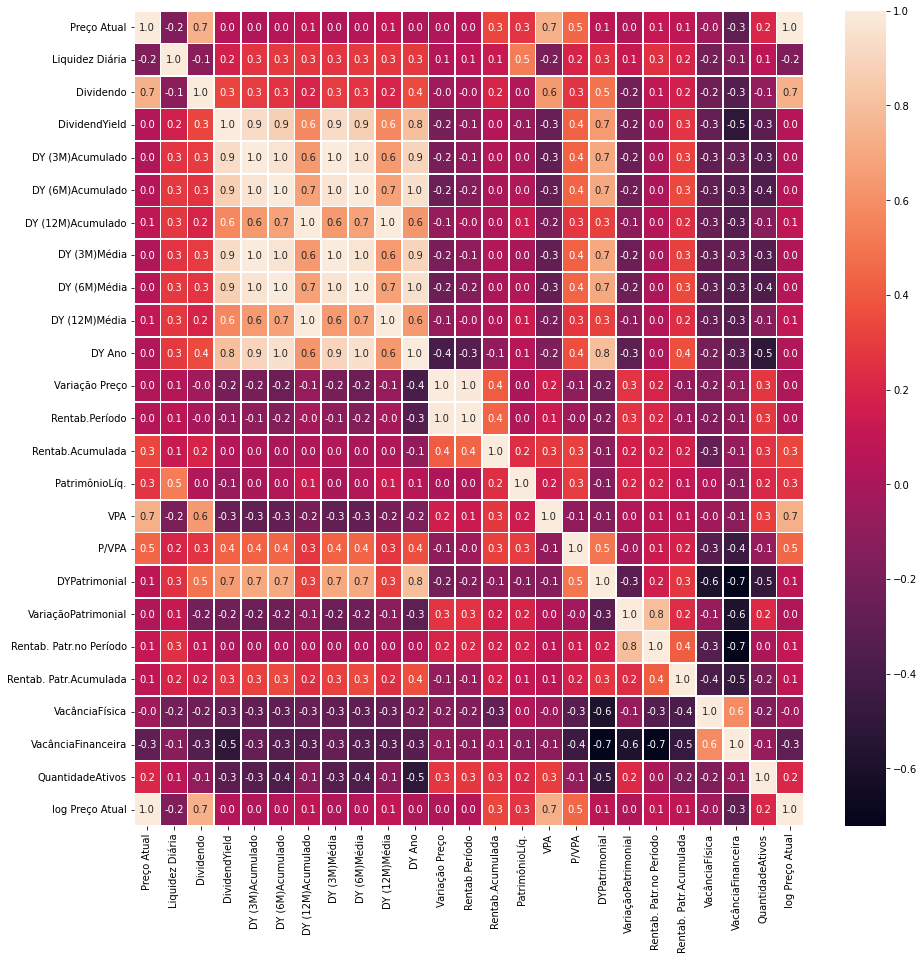

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,15))
corr_matrix = FII_df.corr(method='spearman')

plot = sns.heatmap(corr_matrix, annot= True, fmt='.1f', linewidths=0.7)
plt.rcParams.update({'font.size': 10})

In [56]:
pivot_table_FIIs = pd.pivot_table(FII_df, values='DY (12M)Acumulado', index=["Setor"], columns=[], aggfunc=('mean', 'median'))
pivot_table_FIIs.sort_values('mean', ascending=False)

,mean,median
Setor,,
Títulos e Val. Mob.,10.443021,11.785
Logística,9.362273,9.265
Outros,8.613095,10.040
Hotel,7.786667,5.540
Lajes Corporativas,7.331707,7.230
Híbrido,6.810000,7.270
Hospital,6.442500,8.220
Shoppings,6.215455,7.675
Residencial,4.122857,0.000


In [57]:
FII_df['Fundos_VPA'] = FII_df['P/VPA'] < 100
FII_VPA = FII_df[FII_df['Fundos_VPA']==True]
FII_VPA

,Códigodo fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,...,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos,log Preço Atual,Fundos_VPA
0,FIVN11,Shoppings,3.23,18114.0,0.00,0.00,0.00,0.00,0.00,0.00,...,46.0,NaN,NaN,NaN,NaN,56.00,NaN,1,1.442202,True
2,XTED11,Lajes Corporativas,7.53,193.0,0.00,0.00,0.00,0.00,0.00,0.00,...,55.0,NaN,NaN,NaN,NaN,0.00,100.0,1,2.143589,True
3,ALMI11,Lajes Corporativas,905.00,5.0,0.00,0.00,0.00,0.00,0.00,0.00,...,40.0,NaN,NaN,NaN,NaN,64.05,NaN,1,6.809039,True
4,PABY11,Híbrido,8.40,674.0,0.00,0.00,0.00,0.00,0.00,0.00,...,-56.0,NaN,NaN,NaN,NaN,NaN,NaN,1,2.240710,True
7,GSFI11,Shoppings,4.88,4899.0,0.00,0.03,0.03,0.03,0.03,0.01,...,36.0,NaN,NaN,NaN,NaN,10.30,NaN,10,1.771557,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,MORE11,Títulos e Val. Mob.,75.05,4615.0,0.60,0.80,2.61,6.01,11.51,0.87,...,85.0,0.74,0.74,1.49,0.82,NaN,NaN,0,4.331391,True
310,MGHT11,Hotel,67.00,2005.0,0.65,0.97,3.36,6.83,12.36,1.12,...,77.0,0.90,-10.30,-9.49,-7.85,NaN,NaN,0,4.219508,True
311,SNFF11,Títulos e Val. Mob.,89.30,4452.0,0.65,0.73,2.18,5.20,9.64,0.73,...,95.0,0.69,3.21,3.92,4.29,NaN,NaN,0,4.503137,True
312,TRNT11,Lajes Corporativas,115.00,1238.0,0.29,0.25,0.76,1.98,4.24,0.25,...,57.0,0.14,0.02,0.16,0.81,49.90,NaN,1,4.753590,True


In [ ]:
#Dividend Yeld Maior que 10%

In [58]:
FII_VPA_Select = FII_VPA[FII_VPA ['DY (12M)Acumulado'] > 10]
FII_VPA_Select

,Códigodo fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,...,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos,log Preço Atual,Fundos_VPA
8,NEWU11,Lajes Corporativas,36.01,1620.0,0.00,0.00,0.00,0.56,16.63,0.00,...,55.0,NaN,NaN,NaN,NaN,63.2,NaN,3,3.611188,True
10,FAMB11B,Lajes Corporativas,755.00,45.0,9.16,0.56,2.17,4.78,10.43,0.72,...,25.0,NaN,NaN,NaN,NaN,100.0,NaN,1,6.628041,True
33,MGCR11,Títulos e Val. Mob.,90.32,2795.0,1.35,1.57,4.35,7.99,14.12,1.45,...,99.0,NaN,NaN,NaN,NaN,NaN,NaN,0,4.514370,True
34,NAVT11,Títulos e Val. Mob.,81.45,376.0,0.85,1.15,3.50,6.84,11.97,1.17,...,88.0,NaN,NaN,NaN,NaN,NaN,NaN,0,4.412192,True
35,CORM11,Híbrido,81.00,412.0,0.77,0.90,2.76,5.35,11.38,0.92,...,89.0,0.89,-2.33,-1.45,0.21,NaN,NaN,0,4.406719,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,GCFF11,Títulos e Val. Mob.,72.98,424.0,0.74,1.01,3.14,6.34,12.20,1.05,...,82.0,0.88,-2.44,-1.58,-0.77,NaN,NaN,0,4.303795,True
308,VGIR11,Títulos e Val. Mob.,9.84,620037.0,0.13,1.32,3.90,7.60,13.49,1.30,...,10.0,0.13,0.11,0.24,4.68,NaN,NaN,0,2.383243,True
309,MORE11,Títulos e Val. Mob.,75.05,4615.0,0.60,0.80,2.61,6.01,11.51,0.87,...,85.0,0.74,0.74,1.49,0.82,NaN,NaN,0,4.331391,True
310,MGHT11,Hotel,67.00,2005.0,0.65,0.97,3.36,6.83,12.36,1.12,...,77.0,0.90,-10.30,-9.49,-7.85,NaN,NaN,0,4.219508,True
